# BERT Fine-tuning results

In [2]:
import wandb
import matplotlib.pyplot as plt

In [3]:
wandb.login(key='')
api = wandb.Api()

project_name = "bert-multiling-training"

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/gustaw/.netrc
wandb: Currently logged in as: gustaw-blachowski (sf-kozlowski-university-of-warsaw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [4]:
runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")
history = runs[0].history()
history.head()

,_step,_runtime,train/loss,train/grad_norm,train/learning_rate,train/epoch,_timestamp,train/global_step,eval/B-COUPON_accuracy,eval/O_accuracy,...,eval_recall,eval_O_accuracy,eval_runtime,eval_steps_per_second,eval_overall_accuracy,epoch,eval_precision,eval_I-COUPON_accuracy,eval_samples_per_second,eval_loss
0,0,16.063793,0.7547,3.576647,0.000020,0.026385,1.741200e+09,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,16.895918,0.3975,3.506495,0.000020,0.052770,1.741200e+09,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,17.759797,0.3524,100.673080,0.000019,0.079156,1.741200e+09,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,18.616580,0.2151,28.061037,0.000019,0.105541,1.741200e+09,40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,19.442465,0.1576,2.725793,0.000019,0.131926,1.741200e+09,50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
history.columns

Index(['_step', '_runtime', 'train/loss', 'train/grad_norm',
       'train/learning_rate', 'train/epoch', '_timestamp', 'train/global_step',
       'eval/B-COUPON_accuracy', 'eval/O_accuracy', 'eval/loss',
       'eval/I-COUPON_accuracy', 'eval/f1', 'eval/precision', 'eval/recall',
       'eval/steps_per_second', 'eval/overall_accuracy',
       'eval/samples_per_second', 'eval/runtime', 'eval_f1',
       'eval_B-COUPON_accuracy', 'eval_recall', 'eval_O_accuracy',
       'eval_runtime', 'eval_steps_per_second', 'eval_overall_accuracy',
       'epoch', 'eval_precision', 'eval_I-COUPON_accuracy',
       'eval_samples_per_second', 'eval_loss'],
      dtype='object')

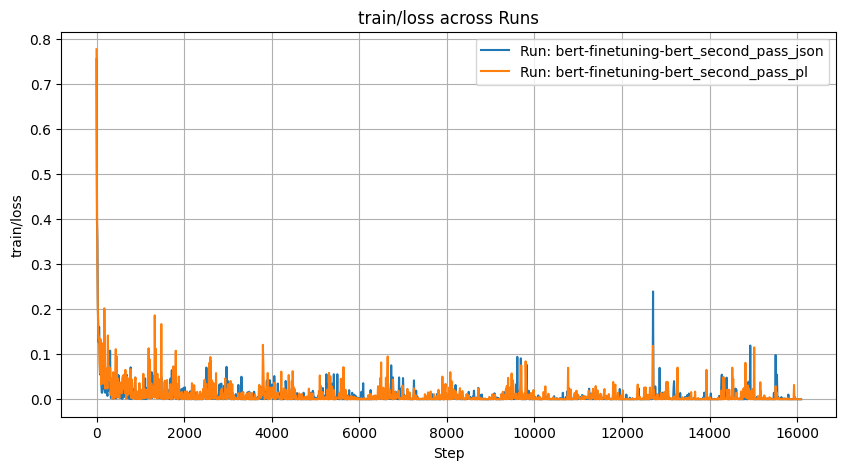

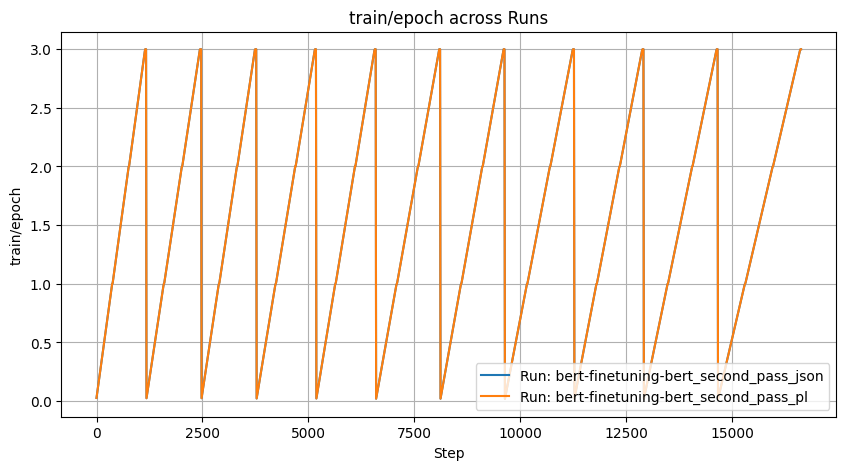

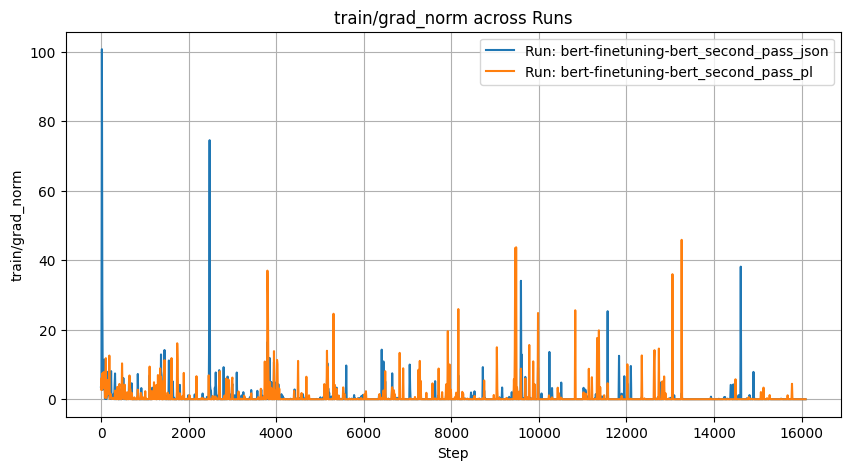

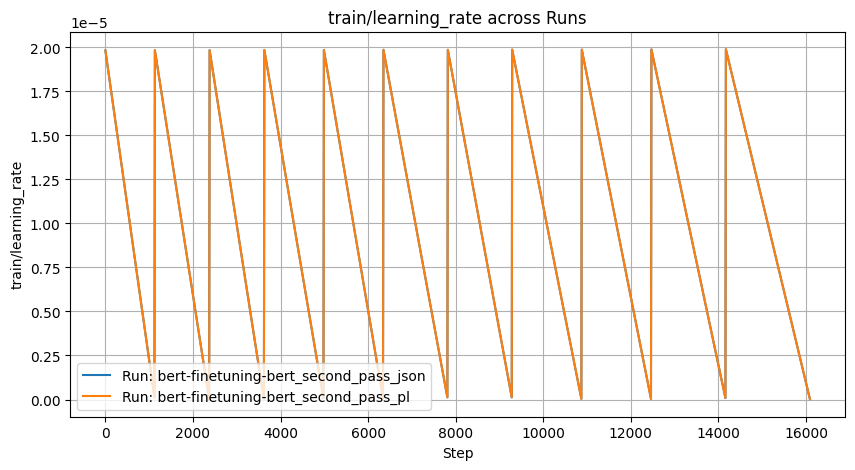

In [6]:
def plot_runs_data(runs, metric):
    plt.figure(figsize=(10, 5))
    for run in runs:
        hist = run.history()
        if hist.shape[0] == 0:
            continue
        if metric in hist.columns:
            # filter-out nans
            data = hist[metric].dropna()
            labels = [x*10 for x in range(data.shape[0])]
            #print(hist.columns)
            #print(hist[metric])
            plt.plot(labels, data, label=f"Run: {run.name}")

    plt.xlabel("Step")
    plt.ylabel(metric)
    plt.title(f"{metric} across Runs")
    plt.legend()
    plt.grid()
    plt.show()

plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/epoch")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

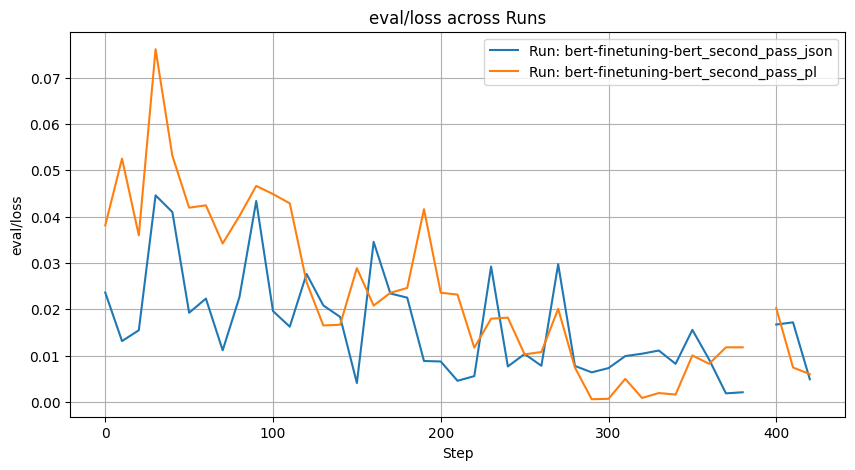

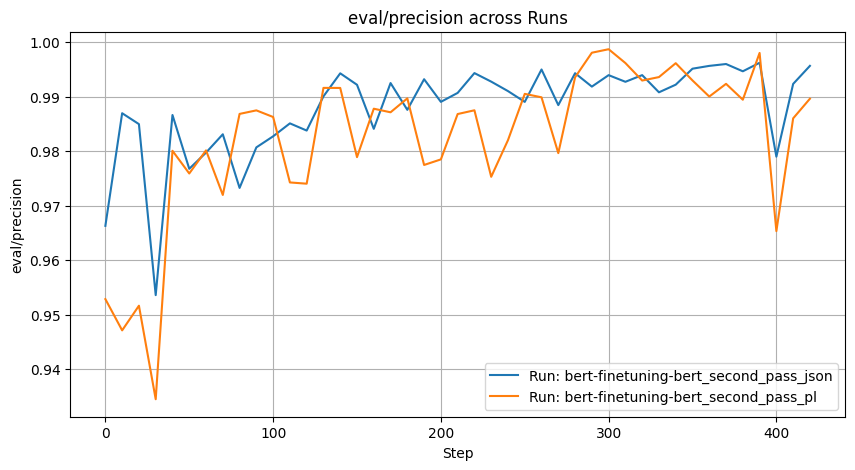

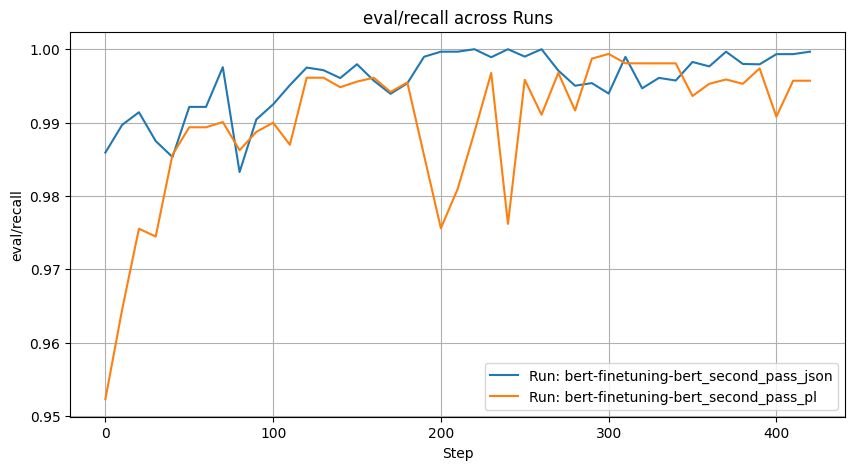

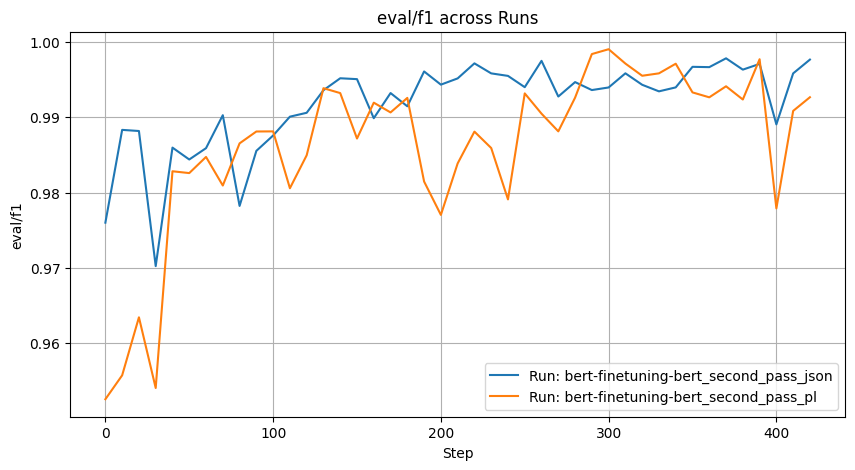

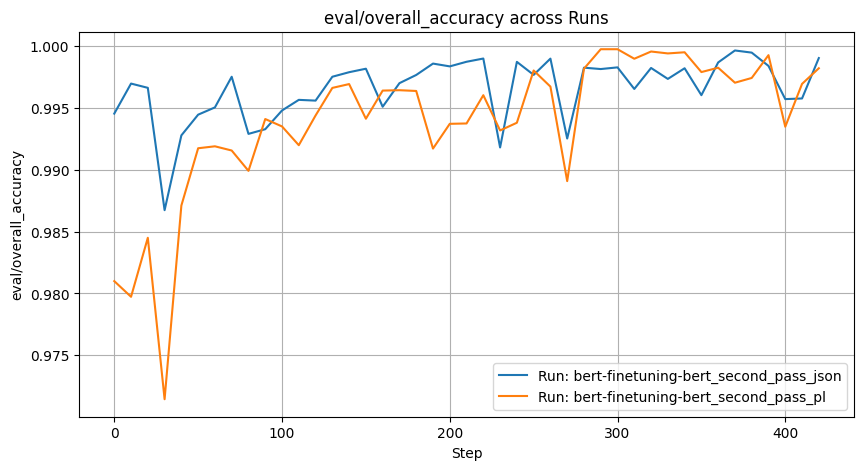

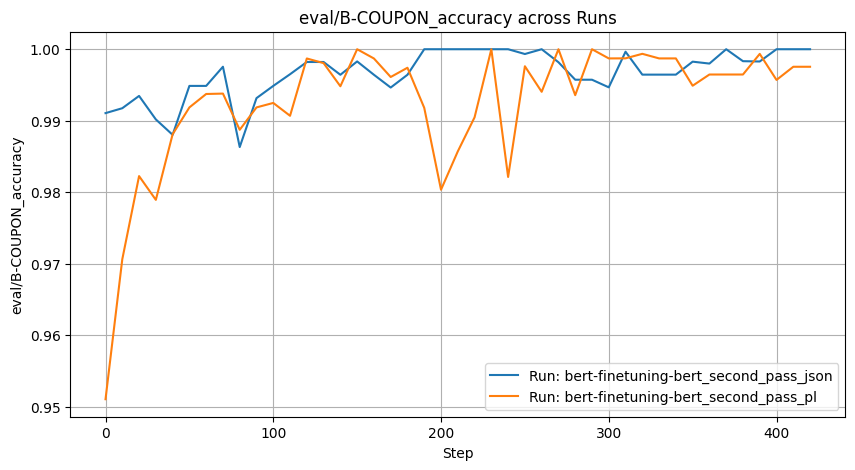

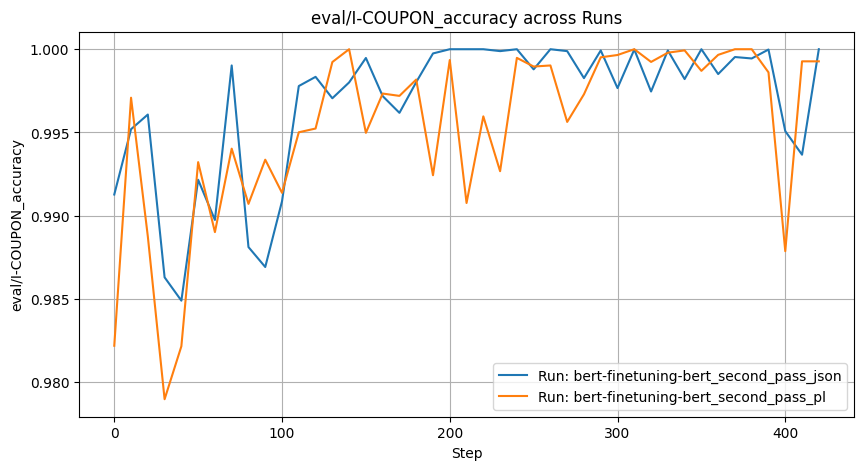

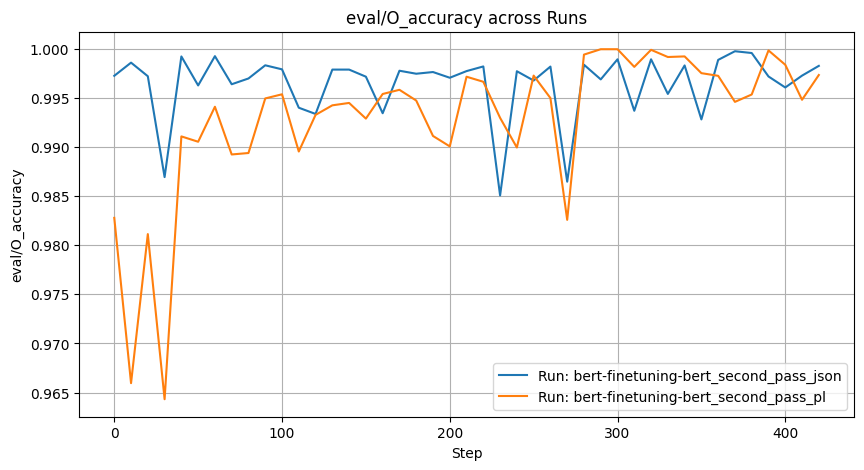

In [7]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")
plot_runs_data(runs, "eval/f1")
plot_runs_data(runs, "eval/overall_accuracy")
plot_runs_data(runs, "eval/B-COUPON_accuracy")
plot_runs_data(runs, "eval/I-COUPON_accuracy")
plot_runs_data(runs, "eval/O_accuracy")